This notebook demonstrates how to use the Partition explainer for a multiclass text classification scenario. Once the SHAP values are computed for a set of sentences we then visualize feature attributions towards individual classes. The text classifcation model we use is BERT fine-tuned on an emotion dataset to classify a sentence among six classes: joy, sadness, anger, fear, love and surprise.

#https://shap.readthedocs.io/en/latest/example_notebooks/text_examples/sentiment_analysis/Emotion%20classification%20multiclass%20example.html


In [6]:
import datasets
import pandas as pd
import transformers

import shap

# load the emotion dataset
dataset = datasets.load_dataset("emotion", split="train")
data = pd.DataFrame({"text": dataset["text"], "emotion": dataset["label"]})

In [7]:
data.head()

,text,emotion
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


Build a transformers pipline

In [9]:
# load the model and tokenizer
tokenizer = transformers.AutoTokenizer.from_pretrained("nateraw/bert-base-uncased-emotion", use_fast=True)
model = transformers.AutoModelForSequenceClassification.from_pretrained("nateraw/bert-base-uncased-emotion")

# build a pipeline object to do predictions
pred = transformers.pipeline(
    "text-classification",
    model=model,
    tokenizer=tokenizer,
    device=-1, # -1 indicates CPU
    return_all_scores=True,
)

Device set to use cpu
/usr/local/lib/python3.12/dist-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [10]:
explainer = shap.Explainer(pred)

In [11]:
shap_values = explainer(data["text"][:3])

  0%|          | 0/42 [00:00<?, ?it/s]

PartitionExplainer explainer:  33%|███▎      | 1/3 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 100%|██████████| 3/3 [01:37<00:00, 40.11s/it]

  0%|          | 0/132 [00:00<?, ?it/s]

PartitionExplainer explainer: 4it [01:46, 35.48s/it]


In [12]:
shap.plots.text(shap_values)

In [14]:
# Get predictions for the first 3 texts
print(data["text"][:3].tolist())
outcomes = pred(data["text"][:3].tolist())


# Display the outcomes
for i, outcome in enumerate(outcomes):
    print(f"Text {i+1}:")
    for emotion_score in outcome:
        print(f"  {emotion_score['label']}: {emotion_score['score']:.4f}")
    print("-" * 20)

['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong']
Text 1:
  sadness: 0.9964
  joy: 0.0007
  love: 0.0006
  anger: 0.0012
  fear: 0.0006
  surprise: 0.0004
--------------------
Text 2:
  sadness: 0.9953
  joy: 0.0012
  love: 0.0010
  anger: 0.0005
  fear: 0.0016
  surprise: 0.0004
--------------------
Text 3:
  sadness: 0.0023
  joy: 0.0007
  love: 0.0021
  anger: 0.9915
  fear: 0.0019
  surprise: 0.0016
--------------------


Visualize the impact on a single class

In [15]:
shap.plots.text(shap_values[:, :, "anger"])

Plotting the top words impacting a specific class

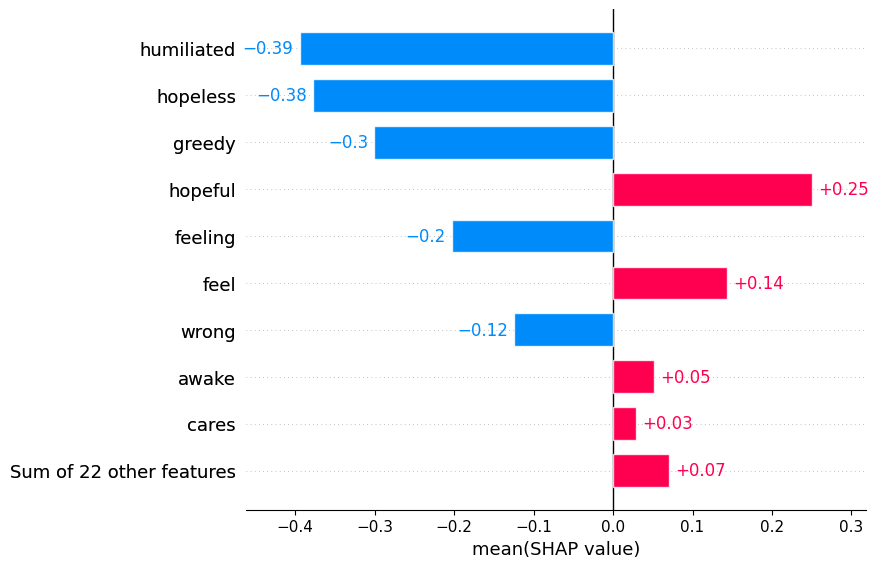

In [16]:
shap.plots.bar(shap_values[:, :, "joy"].mean(0))

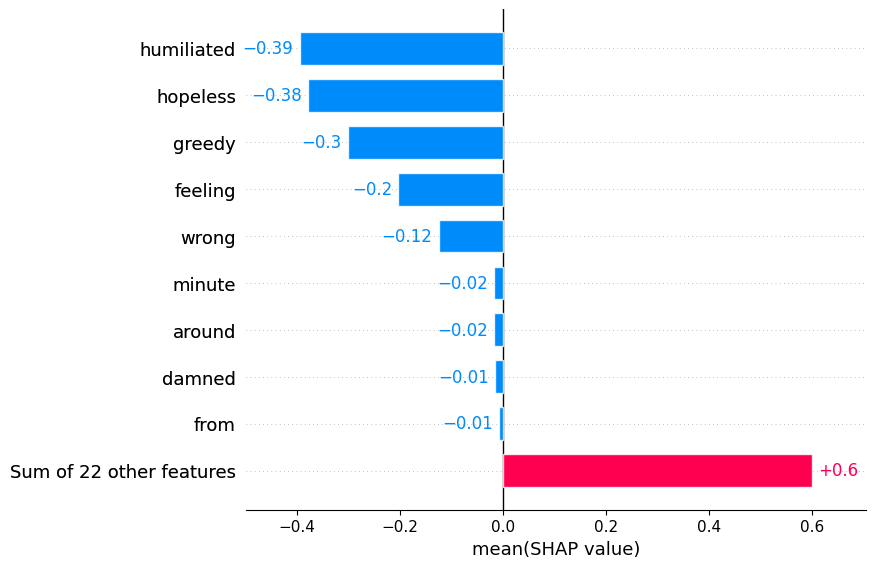

In [17]:
# we can sort the bar chart in decending order
shap.plots.bar(shap_values[:, :, "joy"].mean(0), order=shap.Explanation.argsort)

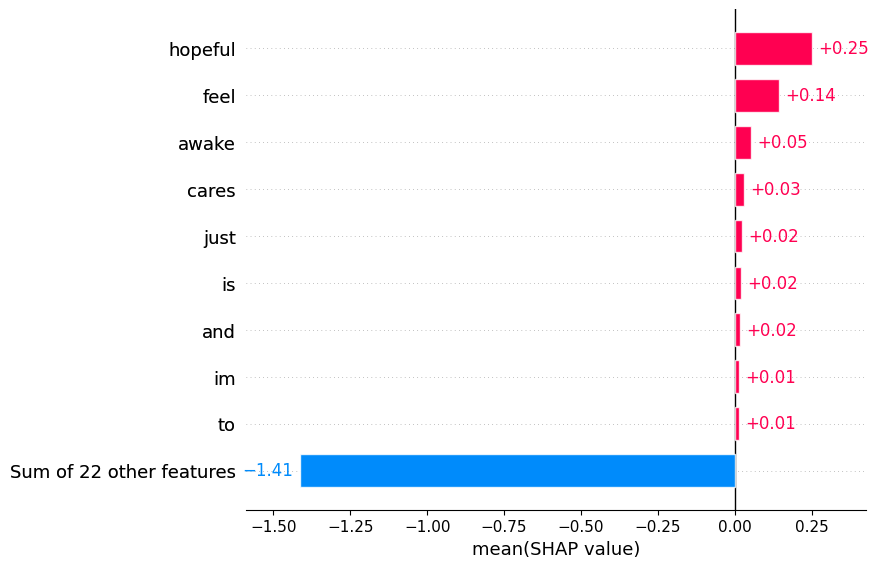

In [18]:
# ...or acending order
shap.plots.bar(shap_values[:, :, "joy"].mean(0), order=shap.Explanation.argsort.flip)